# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import chart_studio.plotly
# from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from scipy.sparse import hstack,vstack
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.impute import SimpleImputer
from sklearn.datasets import load_digits
#from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from prettytable import PrettyTable
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
#import math
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import pdb

## 1.1 Reading Data

In [0]:
Project_data = pd.read_csv('train_data.csv')
Resource_data = pd.read_csv('resources.csv')
print(Project_data.shape)
print(Resource_data.shape)

(109248, 17)
(1541272, 4)


In [0]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(Project_data.columns)]
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
Project_data['Date'] = pd.to_datetime(Project_data['project_submitted_datetime'])
Project_data.drop('project_submitted_datetime', axis=1, inplace=True)
Project_data.sort_values(by=['Date'], inplace=True)
# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
Project_data = Project_data[cols]
Project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


## 1.2 preprocessing of `project_subject_categories`

In [0]:
y = Project_data['project_is_approved'].values
Project_data.drop(['project_is_approved'], axis=1, inplace=True)
lpd = len(Project_data)
ys = np.zeros(lpd, dtype=np.int32)
X = Project_data

In [0]:
#Spliting the Dataset into three Train,CV and Test
X1, X_Test, Y1, Y_Test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=ys)
nx1 = len(X1)
ys1 = np.zeros(nx1, dtype=np.int32)
X_Train, X_CV, Y_Train, Y_CV = train_test_split(X1, Y1, test_size=0.33, random_state=0, stratify=ys1)
print('Shape of the X_Train data is {0} and Y_Train data is: {1}'.format(X_Train.shape,Y_Train.shape[0]))
print('Shape of the X_CV data is    {0} and Y_CV data is   : {1}'.format(X_CV.shape,Y_CV.shape[0]))
print('Shape of the X_Test data is  {0} and Y_Test data is : {1}'.format(X_Test.shape,Y_Test.shape[0]))

Shape of the X_Train data is (49041, 16) and Y_Train data is: 49041
Shape of the X_CV data is    (24155, 16) and Y_CV data is   : 24155
Shape of the X_Test data is  (36052, 16) and Y_Test data is : 36052


In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

#****************************************************************Train Data********************************************************************************************
catogories = list(X_Train['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_Train['clean_categories'] = cat_list
X_Train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_Train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict_Train = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(len(sorted_cat_dict_Train))
#****************************************************************CV Data********************************************************************************************
catogories = list(X_CV['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_CV['clean_categories'] = cat_list
X_CV.drop(['project_subject_categories'], axis=1, inplace=True)

#****************************************************************Test Data********************************************************************************************
catogories = list(X_Test['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_Test['clean_categories'] = cat_list
X_Test.drop(['project_subject_categories'], axis=1, inplace=True)


9


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
#****************************************************************Train Data********************************************************************************************
sub_catogories = list(X_Train['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_Train['clean_subcategories'] = sub_cat_list
X_Train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_Train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict_Train = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
print(len(sorted_sub_cat_dict_Train))
#****************************************************************CV Data********************************************************************************************
sub_catogories = list(X_CV['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_CV['clean_subcategories'] = sub_cat_list
X_CV.drop(['project_subject_subcategories'], axis=1, inplace=True)

#****************************************************************Test Data********************************************************************************************
sub_catogories = list(X_Test['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_Test['clean_subcategories'] = sub_cat_list
X_Test.drop(['project_subject_subcategories'], axis=1, inplace=True)

30


## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
X_Train["essay"] = X_Train["project_essay_1"].map(str) +\
                        X_Train["project_essay_2"].map(str) + \
                        X_Train["project_essay_3"].map(str) + \
                        X_Train["project_essay_4"].map(str)

X_CV["essay"] = X_CV["project_essay_1"].map(str) +\
                        X_CV["project_essay_2"].map(str) + \
                        X_CV["project_essay_3"].map(str) + \
                        X_CV["project_essay_4"].map(str)

X_Test["essay"] = X_Test["project_essay_1"].map(str) +\
                        X_Test["project_essay_2"].map(str) + \
                        X_Test["project_essay_3"].map(str) + \
                        X_Test["project_essay_4"].map(str)

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
# tqdm is for printing the status bar

#----------------------------------PreProcessing of Essays in Train data set------------------------------------------------
preprocessed_essays_Train = []
for sentance in tqdm(X_Train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Train.append(sent.lower().strip())
# pdb.set_trace()

#----------------------------------PreProcessing of Essays in CV data set---------------------------------------------------
preprocessed_essays_CV = []
for sentance in tqdm(X_CV['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_CV.append(sent.lower().strip())
# pdb.set_trace()

#----------------------------------PreProcessing of Essays in Test data set--------------------------------------------------
preprocessed_essays_Test = []
for sentance in tqdm(X_Test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Test.append(sent.lower().strip())
# pdb.set_trace()

100%|██████████| 36052/36052 [00:18<00:00, 1947.68it/s]


In [0]:
word_count_essay_Train = []
for a in tqdm(X_Train["essay"]) :
    b = len(a.split())
    word_count_essay_Train.append(b)

X_Train["word_count_essay_Train"] = word_count_essay_Train

word_count_essay_CV = []
for a in tqdm(X_CV["essay"]) :
    b = len(a.split())
    word_count_essay_CV.append(b)

X_CV["word_count_essay_CV"] = word_count_essay_CV

word_count_essay_Test = []
for a in tqdm(X_Test["essay"]) :
    b = len(a.split())
    word_count_essay_Test.append(b)

X_Test["word_count_essay_Test"] = word_count_essay_Test

100%|██████████| 36052/36052 [00:00<00:00, 64253.97it/s]


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# Combining all the above stundents 
# tqdm is for printing the status bar

#----------------------------------PreProcessing of Project Title in Train data set-----------------------------------------
preprocessed_titles_Train = []
for sentance in tqdm(X_Train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_Train.append(sent.lower().strip())
# pdb.set_trace()

#----------------------------------PreProcessing of Project Title in CV data set--------------------------------------------
preprocessed_titles_CV = []
for sentance in tqdm(X_CV['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_CV.append(sent.lower().strip())
# pdb.set_trace()

#----------------------------------PreProcessing of Project Title in Test data set------------------------------------------
preprocessed_titles_Test = []
for sentance in tqdm(X_Test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_Test.append(sent.lower().strip())
# pdb.set_trace()

100%|██████████| 36052/36052 [00:00<00:00, 42899.12it/s]


In [0]:
word_count_title_Train = []
for a in tqdm(X_Train["project_title"]) :
    b = len(a.split())
    word_count_title_Train.append(b)

X_Train["word_count_title_Train"] = word_count_title_Train

word_count_title_CV = []
for a in tqdm(X_CV["project_title"]) :
    b = len(a.split())
    word_count_title_CV.append(b)

X_CV["word_count_title_CV"] = word_count_title_CV

word_count_title_Test = []
for a in tqdm(X_Test["project_title"]) :
    b = len(a.split())
    word_count_title_Test.append(b)

X_Test["word_count_title_Test"] = word_count_title_Test

100%|██████████| 36052/36052 [00:00<00:00, 892691.70it/s]


## 1.5 Preparing data for models

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
#-------------------------Vectorizing categorical data for Train,CV and Test------------------------------------------------

# we use count vectorizer to convert the values into one hot encoding
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_cat.fit(X_Train['clean_categories'].values)
categories_one_hot_Train = vectorizer_cat.transform(X_Train['clean_categories'].values)
categories_one_hot_CV = vectorizer_cat.transform(X_CV['clean_categories'].values)
categories_one_hot_Test = vectorizer_cat.transform(X_Test['clean_categories'].values)
print(vectorizer_cat.get_feature_names())
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(categories_one_hot_Train.shape))
print('Shape of CV dataset matrix after one hot encoding is: {0}'.format(categories_one_hot_CV.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(categories_one_hot_Test.shape))

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (49041, 9)
Shape of CV dataset matrix after one hot encoding is: (24155, 9)
Shape of Test dataset matrix after one hot encoding is: (36052, 9)


In [0]:
#-------------------------Vectorizing Sub categorical data for Train,CV and Test------------------------------------------------

# we use count vectorizer to convert the values into one hot encoding
vectorizer_sub_cat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_sub_cat.fit(X_Train['clean_categories'].values)
sub_categories_one_hot_Train = vectorizer_sub_cat.transform(X_Train['clean_subcategories'].values)
sub_categories_one_hot_CV = vectorizer_sub_cat.transform(X_CV['clean_subcategories'].values)
sub_categories_one_hot_Test = vectorizer_sub_cat.transform(X_Test['clean_subcategories'].values)
print(vectorizer_sub_cat.get_feature_names())
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(sub_categories_one_hot_Train.shape))
print('Shape of CV dataset matrix after one hot encoding is: {0}'.format(sub_categories_one_hot_CV.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(sub_categories_one_hot_Test.shape))

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'Health_LifeScience', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (49041, 30)
Shape of CV dataset matrix after one hot encoding is: (24155, 30)
Shape of Test dataset matrix after one hot encoding is: (36052, 30)


**School State**

In [0]:
#-------------------------Vectorizing categorical data of School state for Train dataset-------------------------------------

school_catogories_Train = list(X_Train['school_state'].values)
school_list_Train = []
for sent in school_catogories_Train:
    school_list_Train.append(sent.lower().strip())
X_Train['school_categories'] = school_list_Train
X_Train.drop(['school_state'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_school_Train = Counter()
for word in X_Train['school_categories'].values:
    my_counter_school_Train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
school_dict_Train = dict(my_counter_school_Train)
sorted_school_dict_Train = dict(sorted(school_dict_Train.items(), key=lambda kv: kv[1]))

vectorizer_school = CountVectorizer(vocabulary=list(sorted_school_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_school.fit(X_Train['school_categories'].values)
#print(vectorizer.get_feature_names())

school_one_hot_Train = vectorizer_school.transform(X_Train['school_categories'].values)

#-------------------------Vectorizing categorical data of School state for CV dataset---------------------------------------

school_catogories_CV = list(X_CV['school_state'].values)
school_list_CV = []
for sent in school_catogories_CV:
    school_list_CV.append(sent.lower().strip())
X_CV['school_categories'] = school_list_CV
X_CV.drop(['school_state'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_school_CV = Counter()
for word in X_CV['school_categories'].values:
    my_counter_school_CV.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
school_dict_CV = dict(my_counter_school_CV)
sorted_school_dict_CV = dict(sorted(school_dict_CV.items(), key=lambda kv: kv[1]))
school_one_hot_CV = vectorizer_school.transform(X_CV['school_categories'].values)

#-------------------------Vectorizing categorical data of School state for Test dataset--------------------------------------

school_catogories_Test = list(X_Test['school_state'].values)
school_list_Test = []
for sent in school_catogories_Test:
    school_list_Test.append(sent.lower().strip())
X_Test['school_categories'] = school_list_Test
X_Test.drop(['school_state'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_school_Test = Counter()
for word in X_Test['school_categories'].values:
    my_counter_school_Test.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
school_dict_Test = dict(my_counter_school_Test)
sorted_school_dict_Test = dict(sorted(school_dict_Test.items(), key=lambda kv: kv[1]))
school_one_hot_Test = vectorizer_school.transform(X_Test['school_categories'].values)
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(school_one_hot_Train.shape))
print('Shape of CV dataset matrix after one hot encoding is: {0}'.format(school_one_hot_CV.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(school_one_hot_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (49041, 51)
Shape of CV dataset matrix after one hot encoding is: (24155, 51)
Shape of Test dataset matrix after one hot encoding is: (36052, 51)


**Prefix**

In [0]:
#-------------------------Vectorizing categorical data of Teacher Prefix for Train dataset-------------------------------------

# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
prefix_catogories_Train = list(X_Train['teacher_prefix'].values)
prefix_list_Train = []
for sent in prefix_catogories_Train:
    sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    prefix_list_Train.append(sent.lower().strip())
X_Train['prefix_catogories'] = prefix_list_Train
X_Train.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_prefix_Train = Counter()
for word in X_Train['prefix_catogories'].values:
    my_counter_prefix_Train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
prefix_dict_Train = dict(my_counter_prefix_Train)
sorted_prefix_dict_Train = dict(sorted(prefix_dict_Train.items(), key=lambda kv: kv[1]))


vectorizer_prefix = CountVectorizer(vocabulary=list(sorted_prefix_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_prefix.fit(X_Train['prefix_catogories'].values)
#print(vectorizer.get_feature_names())

prefix_one_hot_Train = vectorizer_prefix.transform(X_Train['prefix_catogories'].values)
#print("Shape of matrix after one hot encodig ",prefix_one_hot.shape)

#-------------------------Vectorizing categorical data of Teacher Prefix for CV dataset---------------------------------------

prefix_catogories_CV = list(X_CV['teacher_prefix'].values)
prefix_list_CV = []
for sent in prefix_catogories_CV:
    sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    prefix_list_CV.append(sent.lower().strip())
X_CV['prefix_catogories'] = prefix_list_CV
X_CV.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_prefix_CV = Counter()
for word in X_CV['prefix_catogories'].values:
    my_counter_prefix_CV.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
prefix_dict_CV = dict(my_counter_prefix_CV)
sorted_prefix_dict_CV = dict(sorted(prefix_dict_CV.items(), key=lambda kv: kv[1]))
prefix_one_hot_CV = vectorizer_prefix.transform(X_CV['prefix_catogories'].values)

#-------------------------Vectorizing categorical data of Teacher Prefix for Test dataset-------------------------------------

prefix_catogories_Test = list(X_Test['teacher_prefix'].values)
prefix_list_Test = []
for sent in prefix_catogories_Test:
    sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    prefix_list_Test.append(sent.lower().strip())
X_Test['prefix_catogories'] = prefix_list_Test
X_Test.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_prefix_Test = Counter()
for word in X_Test['prefix_catogories'].values:
    my_counter_prefix_Test.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
prefix_dict_Test = dict(my_counter_prefix_Test)
sorted_prefix_dict_Test = dict(sorted(prefix_dict_Test.items(), key=lambda kv: kv[1]))
prefix_one_hot_Test = vectorizer_prefix.transform(X_Test['prefix_catogories'].values)
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(prefix_one_hot_Train.shape))
print('Shape of CV dataset matrix after one hot encoding is: {0}'.format(prefix_one_hot_CV.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(prefix_one_hot_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (49041, 6)
Shape of CV dataset matrix after one hot encoding is: (24155, 6)
Shape of Test dataset matrix after one hot encoding is: (36052, 6)


**project_grade_category**

In [0]:
#-------------------------Vectorizing categorical data of Project Grade for Train dataset------------------------------------

# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
grade_catogories_Train = list(X_Train['project_grade_category'].values)
grade_list_Train = []
for sent in grade_catogories_Train:
    sent = sent.replace('-','_')
    sent = sent.replace(' ','_')
    # sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    grade_list_Train.append(sent.lower().strip())

# temp = temp.replace('-','_')
X_Train['new_grade_category'] = grade_list_Train
X_Train.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_grade_Train = Counter()
for word in X_Train['new_grade_category'].values:
    my_counter_grade_Train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict_Train = dict(my_counter_grade_Train)
sorted_grade_dict_Train = dict(sorted(grade_dict_Train.items(), key=lambda kv: kv[1]))

vectorizer_grade = CountVectorizer(vocabulary=list(sorted_grade_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_Train['new_grade_category'].values)
#print(vectorizer.get_feature_names())

grade_one_hot_Train = vectorizer_grade.transform(X_Train['new_grade_category'].values)

#-------------------------Vectorizing categorical data of Project Grade for CV dataset--------------------------------------

grade_catogories_CV = list(X_CV['project_grade_category'].values)
grade_list_CV = []
for sent in grade_catogories_CV:
    sent = sent.replace('-','_')
    sent = sent.replace(' ','_')
    # sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    grade_list_CV.append(sent.lower().strip())

# temp = temp.replace('-','_')
X_CV['new_grade_category'] = grade_list_CV
X_CV.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_grade_CV = Counter()
for word in X_CV['new_grade_category'].values:
    my_counter_grade_CV.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict_CV = dict(my_counter_grade_CV)
sorted_grade_dict_CV = dict(sorted(grade_dict_CV.items(), key=lambda kv: kv[1]))

grade_one_hot_CV = vectorizer_grade.transform(X_CV['new_grade_category'].values)

#-------------------------Vectorizing categorical data of Project Grade for Train dataset-----------------------------------

grade_catogories_Test = list(X_Test['project_grade_category'].values)
grade_list_Test = []
for sent in grade_catogories_Test:
    sent = sent.replace('-','_')
    sent = sent.replace(' ','_')
    # sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    grade_list_Test.append(sent.lower().strip())

# temp = temp.replace('-','_')
X_Test['new_grade_category'] = grade_list_Test
X_Test.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_grade_Test = Counter()
for word in X_Test['new_grade_category'].values:
    my_counter_grade_Test.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict_Test = dict(my_counter_grade_Test)
sorted_grade_dict_Test = dict(sorted(grade_dict_Test.items(), key=lambda kv: kv[1]))

grade_one_hot_Test = vectorizer_grade.transform(X_Test['new_grade_category'].values)
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(grade_one_hot_Train.shape))
print('Shape of CV dataset matrix after one hot encoding is: {0}'.format(grade_one_hot_CV.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(grade_one_hot_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (49041, 4)
Shape of CV dataset matrix after one hot encoding is: (24155, 4)
Shape of Test dataset matrix after one hot encoding is: (36052, 4)


### 1.5.2 Vectorizing Numerical features

In [0]:
price_data = Resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_Train = pd.merge(X_Train, price_data, on='id', how='left')
X_CV = pd.merge(X_CV, price_data, on='id', how='left')
X_Test = pd.merge(X_Test, price_data, on='id', how='left')

In [0]:
price_norm = Normalizer(norm='l2', copy=False)
price_norm.fit(X_Train['price'].values.reshape(1,-1))

p=price_norm.transform(X_Train['price'].values.reshape(1,-1))
price_norm.transform(X_CV['price'].values.reshape(1,-1))
price_norm.transform(X_Test['price'].values.reshape(1,-1))
price_norm_Train = (X_Train['price'].values.reshape(-1,1))
price_norm_CV = (X_CV['price'].values.reshape(-1,1))
price_norm_Test = (X_Test['price'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized price dataset matrix after one hot encoding is: {0}'.format(price_norm_Train.shape))
print('Shape of CV normalized price dataset matrix after one hot encoding is: {0}'.format(price_norm_CV.shape))
print('Shape of Test normalized price dataset matrix after one hot encoding is: {0}'.format(price_norm_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized price dataset matrix after one hot encoding is: (49041, 1)
Shape of CV normalized price dataset matrix after one hot encoding is: (24155, 1)
Shape of Test normalized price dataset matrix after one hot encoding is: (36052, 1)


In [0]:
quantity_norm = Normalizer(norm='l2', copy=False)
quantity_norm.fit(X_Train['quantity'].values.reshape(1,-1))

quantity_norm.transform(X_Train['quantity'].values.reshape(1,-1))
quantity_norm.transform(X_CV['quantity'].values.reshape(1,-1))
quantity_norm.transform(X_Test['quantity'].values.reshape(1,-1))
quantity_norm_Train = quantity_norm.transform(X_Train['quantity'].values.reshape(-1,1))
quantity_norm_CV = quantity_norm.transform(X_CV['quantity'].values.reshape(-1,1))
quantity_norm_Test = quantity_norm.transform(X_Test['quantity'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized quantity dataset matrix after one hot encoding is: {0}'.format(quantity_norm_Train.shape))
print('Shape of CV normalized quantity dataset matrix after one hot encoding is: {0}'.format(quantity_norm_CV.shape))
print('Shape of Test normalized quantity dataset matrix after one hot encoding is: {0}'.format(quantity_norm_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized quantity dataset matrix after one hot encoding is: (49041, 1)
Shape of CV normalized quantity dataset matrix after one hot encoding is: (24155, 1)
Shape of Test normalized quantity dataset matrix after one hot encoding is: (36052, 1)


In [0]:
teacher_prev_post_norm = Normalizer(norm='l2', copy=False)
teacher_prev_post_norm.fit(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

teacher_prev_post_norm.transform(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm.transform(X_CV['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm.transform(X_Test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm_Train = teacher_prev_post_norm.transform(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_prev_post_norm_CV = teacher_prev_post_norm.transform(X_CV['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_prev_post_norm_Test = teacher_prev_post_norm.transform(X_Test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized previously posted project dataset matrix after one hot encoding is: {0}'.format(teacher_prev_post_norm_Train.shape))
print('Shape of CV normalized previously posted project dataset matrix after one hot encoding is: {0}'.format(teacher_prev_post_norm_CV.shape))
print('Shape of Test normalized previously posted project dataset matrix after one hot encoding is: {0}'.format(teacher_prev_post_norm_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized previously posted project dataset matrix after one hot encoding is: (49041, 1)
Shape of CV normalized previously posted project dataset matrix after one hot encoding is: (24155, 1)
Shape of Test normalized previously posted project dataset matrix after one hot encoding is: (36052, 1)


In [0]:
title_norm = Normalizer(norm='l2', copy=False)
title_norm.fit(X_Train['word_count_title_Train'].values.reshape(1,-1))
title_norm.transform(X_Train['word_count_title_Train'].values.reshape(1,-1))
title_norm.transform(X_CV['word_count_title_CV'].values.reshape(1,-1))
title_norm.transform(X_Test['word_count_title_Test'].values.reshape(1,-1))
word_count_title_Train = title_norm.transform(X_Train['word_count_title_Train'].values.reshape(-1,1))
word_count_title_CV = title_norm.transform(X_CV['word_count_title_CV'].values.reshape(-1,1))
word_count_title_Test = title_norm.transform(X_Test['word_count_title_Test'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_title_Train.shape))
print('Shape of CV normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_title_CV.shape))
print('Shape of Test normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_title_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized title dataset matrix after one hot encoding is: (49041, 1)
Shape of CV normalized title dataset matrix after one hot encoding is: (24155, 1)
Shape of Test normalized title dataset matrix after one hot encoding is: (36052, 1)


In [0]:
essay_norm = Normalizer(norm='l2', copy=False)
essay_norm.fit(X_Train['word_count_essay_Train'].values.reshape(1,-1))
essay_norm.transform(X_Train['word_count_essay_Train'].values.reshape(1,-1))
essay_norm.transform(X_CV['word_count_essay_CV'].values.reshape(1,-1))
essay_norm.transform(X_Test['word_count_essay_Test'].values.reshape(1,-1))
word_count_essay_Train = essay_norm.transform(X_Train['word_count_essay_Train'].values.reshape(-1,1))
word_count_essay_CV = essay_norm.transform(X_CV['word_count_essay_CV'].values.reshape(-1,1))
word_count_essay_Test = essay_norm.transform(X_Test['word_count_essay_Test'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_essay_Train.shape))
print('Shape of CV normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_essay_CV.shape))
print('Shape of Test normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_essay_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized title dataset matrix after one hot encoding is: (49041, 1)
Shape of CV normalized title dataset matrix after one hot encoding is: (24155, 1)
Shape of Test normalized title dataset matrix after one hot encoding is: (36052, 1)


### 1.5.3 Vectorizing Text data

#### 1.5.3.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essays_bow = CountVectorizer(min_df=10,max_features = 5000,ngram_range=(2, 2))
text_bow_Train = vectorizer_essays_bow.fit_transform(preprocessed_essays_Train)
text_bow_CV = vectorizer_essays_bow.transform(preprocessed_essays_CV)
text_bow_Test = vectorizer_essays_bow.transform(preprocessed_essays_Test)
print("-"*120)
print("Applying Bag Of Words for Text Data")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(text_bow_Train.shape))
print('Shape of CV dataset matrix after one hot encoding is: {0}'.format(text_bow_CV.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(text_bow_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Applying Bag Of Words for Text Data
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (49041, 5000)
Shape of CV dataset matrix after one hot encoding is: (24155, 5000)
Shape of Test dataset matrix after one hot encoding is: (36052, 5000)


**Bag of Words for Project Title**

In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer_titles_bow = CountVectorizer(min_df=10,max_features = 5000,ngram_range=(2, 2))
title_bow_Train = vectorizer_titles_bow.fit_transform(preprocessed_titles_Train)
title_bow_CV = vectorizer_titles_bow.transform(preprocessed_titles_CV)
title_bow_Test = vectorizer_titles_bow.transform(preprocessed_titles_Test)
print("-"*120)
print("Applying Bag Of Words for Project Title Data")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(title_bow_Train.shape))
print('Shape of CV dataset matrix after one hot encoding is: {0}'.format(title_bow_CV.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(title_bow_Test.shape))


------------------------------------------------------------------------------------------------------------------------
Applying Bag Of Words for Project Title Data
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (49041, 1731)
Shape of CV dataset matrix after one hot encoding is: (24155, 1731)
Shape of Test dataset matrix after one hot encoding is: (36052, 1731)


#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essays_tfidf = TfidfVectorizer(min_df=10,max_features = 5000,ngram_range=(2, 2))
text_tfidf_Train = vectorizer_essays_tfidf.fit_transform(preprocessed_essays_Train)
text_tfidf_CV = vectorizer_essays_tfidf.transform(preprocessed_essays_CV)
text_tfidf_Test = vectorizer_essays_tfidf.transform(preprocessed_essays_Test)
print("-"*120)
print("Applying TFIDF for Text Data")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(text_tfidf_Train.shape))
print('Shape of CV dataset matrix after one hot encoding is: {0}'.format(text_tfidf_CV.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(text_tfidf_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Applying TFIDF for Text Data
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (49041, 5000)
Shape of CV dataset matrix after one hot encoding is: (24155, 5000)
Shape of Test dataset matrix after one hot encoding is: (36052, 5000)


**TFIDF vectorizer for Project Title**

In [0]:
vectorizer_titles_tfidf = TfidfVectorizer(min_df=10,max_features = 5000,ngram_range=(2, 2))
title_tfidf_Train = vectorizer_titles_tfidf.fit_transform(preprocessed_titles_Train)
title_tfidf_CV = vectorizer_titles_tfidf.transform(preprocessed_titles_CV)
title_tfidf_Test = vectorizer_titles_tfidf.transform(preprocessed_titles_Test)
print("-"*120)
print("Applying TFIDF for Project Title")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(title_tfidf_Train.shape))
print('Shape of CV dataset matrix after one hot encoding is: {0}'.format(title_tfidf_CV.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(title_tfidf_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Applying TFIDF for Project Title
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (49041, 1731)
Shape of CV dataset matrix after one hot encoding is: (24155, 1731)
Shape of Test dataset matrix after one hot encoding is: (36052, 1731)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_Train.append(vector)
#------------------------------------------------------------------------------------------

avg_w2v_vectors_CV = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_CV): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_CV.append(vector)
#------------------------------------------------------------------------------------------
    
avg_w2v_vectors_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_Test.append(vector)

print(len(avg_w2v_vectors_Test))
print(len(avg_w2v_vectors_Test[1]))

100%|██████████| 36052/36052 [00:09<00:00, 3752.70it/s]

36052
300


**AVG W2V on project_title**

In [0]:
# Similarly you can vectorize for title also
# compute average word2vec for each title.
avg_w2v_vectors_title_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Train): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    cnt_title_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_title += model[word]
            cnt_title_words += 1
    if cnt_title_words != 0:
        vector_title /= cnt_title_words
    avg_w2v_vectors_title_Train.append(vector_title)


#------------------------------------------------------------------------------------------
avg_w2v_vectors_title_CV = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_CV): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    cnt_title_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_title += model[word]
            cnt_title_words += 1
    if cnt_title_words != 0:
        vector_title /= cnt_title_words
    avg_w2v_vectors_title_CV.append(vector_title)

#------------------------------------------------------------------------------------------
avg_w2v_vectors_title_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Test): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    cnt_title_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_title += model[word]
            cnt_title_words += 1
    if cnt_title_words != 0:
        vector_title /= cnt_title_words
    avg_w2v_vectors_title_Test.append(vector_title)

print(len(avg_w2v_vectors_title_Test))
print(len(avg_w2v_vectors_title_Test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 57462.66it/s]

36052
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
tfidf_model_essays = TfidfVectorizer()
tfidf_model_essays.fit(preprocessed_essays_Train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_essays.get_feature_names(), list(tfidf_model_essays.idf_)))
tfidf_words_essays = set(tfidf_model_essays.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essays):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_Train.append(vector)

#------------------------------------------------------------------------------------------
tfidf_w2v_vectors_CV = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_CV): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essays):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_CV.append(vector)
#------------------------------------------------------------------------------------------
tfidf_w2v_vectors_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essays):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_Test.append(vector)
    
print(len(tfidf_w2v_vectors_Test))
print(len(tfidf_w2v_vectors_Test[0]))


100%|██████████| 36052/36052 [01:05<00:00, 549.31it/s]

36052
300


**Using Pretrained Models: TFIDF weighted W2V on project_title**

In [0]:
# Similarly you can vectorize for title also
tfidf_model_title = TfidfVectorizer()
tfidf_model_title.fit(preprocessed_titles_Train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words_title = set(tfidf_model_title.get_feature_names())

# compute tfidf word2vec for each title.
tfidf_w2v_vectors_title_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Train): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector_title += (vector_title * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector_title /= tf_idf_weight
    tfidf_w2v_vectors_title_Train.append(vector_title)
#-----------------------------------------------------------------------------------------------------------------------------------------

tfidf_w2v_vectors_title_CV = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_CV): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector_title += (vector_title * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector_title /= tf_idf_weight
    tfidf_w2v_vectors_title_CV.append(vector_title)
#-----------------------------------------------------------------------------------------------------------------------------------------

    
tfidf_w2v_vectors_title_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Test): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector_title += (vector_title * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector_title /= tf_idf_weight
    tfidf_w2v_vectors_title_Test.append(vector_title)

print(len(tfidf_w2v_vectors_title_Test))
print(len(tfidf_w2v_vectors_title_Test[0]))



100%|██████████| 36052/36052 [00:01<00:00, 32024.76it/s]

36052
300


**Calculating the sentiment score's of each of the essay** 

In [0]:

sid = SentimentIntensityAnalyzer()

essays = X_Train['essay']
essays_sentiment_Train = []
for essay in tqdm(essays):
    res = sid.polarity_scores(essay)
    essays_sentiment_Train.append(res['compound']) #Considering compound as a criteria.
X_Train['sentiment_essay'] = essays_sentiment_Train

essays = X_CV['essay']
essays_sentiment_CV = []
for essay in tqdm(essays):
    res = sid.polarity_scores(essay)
    essays_sentiment_CV.append(res['compound']) #Considering compound as a criteria.
X_CV['sentiment_essay'] = essays_sentiment_CV

essays = X_Test['essay']
essays_sentiment_Test = []
for essay in tqdm(essays):
    res = sid.polarity_scores(essay)
    essays_sentiment_Test.append(res['compound']) #Considering compound as a criteria.
X_Test['sentiment_essay'] = essays_sentiment_Test

sentiment_norm = Normalizer(norm='l2', copy=False)
sentiment_norm.fit(X_Train['sentiment_essay'].values.reshape(1,-1))

sentiment_Train = sentiment_norm.transform(X_Train['sentiment_essay'].values.reshape(1,-1))

sentiment_CV = sentiment_norm.transform(X_CV['sentiment_essay'].values.reshape(1,-1))

sentiment_Test = sentiment_norm.transform(X_Test['sentiment_essay'].values.reshape(1,-1))

sentiment_Train = (X_Train['sentiment_essay'].values.reshape(-1,1))
sentiment_CV = (X_CV['sentiment_essay'].values.reshape(-1,1))
sentiment_Test = (X_Test['sentiment_essay'].values.reshape(-1,1))


print("Shape of sentiment Train matrix after one hot encodig ",sentiment_Train.shape)
print("Shape of sentiment CV matrix after one hot encodig ",sentiment_CV.shape)
print("Shape of sentiment Test matrix after one hot encodig ",sentiment_Test.shape)

100%|██████████| 36052/36052 [01:37<00:00, 381.43it/s]

Shape of sentiment Train matrix after one hot encodig  (49041, 1)
Shape of sentiment CV matrix after one hot encodig  (24155, 1)
Shape of sentiment Test matrix after one hot encodig  (36052, 1)


# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
BOW_Train = hstack((categories_one_hot_Train,sub_categories_one_hot_Train,school_one_hot_Train,grade_one_hot_Train,prefix_one_hot_Train,text_bow_Train,title_bow_Train,price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train, sentiment_Train))
print(BOW_Train.shape)
TFIDF_Train = hstack((categories_one_hot_Train,sub_categories_one_hot_Train,school_one_hot_Train,grade_one_hot_Train,prefix_one_hot_Train,text_tfidf_Train,title_tfidf_Train, price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train, sentiment_Train))
print(TFIDF_Train.shape)
AVG_W2V_Train = hstack((categories_one_hot_Train,sub_categories_one_hot_Train,school_one_hot_Train,grade_one_hot_Train,prefix_one_hot_Train,avg_w2v_vectors_Train,avg_w2v_vectors_title_Train, price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train, sentiment_Train))
print(AVG_W2V_Train.shape)
TFIDF_W2V_Train = hstack((categories_one_hot_Train,sub_categories_one_hot_Train,school_one_hot_Train,grade_one_hot_Train,prefix_one_hot_Train,tfidf_w2v_vectors_Train,tfidf_w2v_vectors_title_Train, price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train, sentiment_Train))
print(TFIDF_W2V_Train.shape)
FiveF_Train = hstack((categories_one_hot_Train,sub_categories_one_hot_Train,school_one_hot_Train,grade_one_hot_Train,prefix_one_hot_Train, price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train, sentiment_Train))
print(FiveF_Train.shape)

(49041, 6837)
(49041, 6837)
(49041, 706)
(49041, 706)
(49041, 106)


In [0]:
BOW_CV = hstack((categories_one_hot_CV,sub_categories_one_hot_CV,school_one_hot_CV,grade_one_hot_CV,prefix_one_hot_CV,text_bow_CV,title_bow_CV,price_norm_CV, quantity_norm_CV, teacher_prev_post_norm_CV, word_count_title_CV, word_count_essay_CV, sentiment_CV))
print(BOW_CV.shape)
TFIDF_CV = hstack((categories_one_hot_CV,sub_categories_one_hot_CV,school_one_hot_CV,grade_one_hot_CV,prefix_one_hot_CV,text_tfidf_CV,title_tfidf_CV,price_norm_CV, quantity_norm_CV, teacher_prev_post_norm_CV, word_count_title_CV, word_count_essay_CV, sentiment_CV))
print(TFIDF_CV.shape) 
AVG_W2V_CV = hstack((categories_one_hot_CV,sub_categories_one_hot_CV,school_one_hot_CV,grade_one_hot_CV,prefix_one_hot_CV,avg_w2v_vectors_CV,avg_w2v_vectors_title_CV, price_norm_CV, quantity_norm_CV, teacher_prev_post_norm_CV, word_count_title_CV, word_count_essay_CV, sentiment_CV))
print(AVG_W2V_CV.shape)
TFIDF_W2V_CV = hstack((categories_one_hot_CV,sub_categories_one_hot_CV,school_one_hot_CV,grade_one_hot_CV,prefix_one_hot_CV,tfidf_w2v_vectors_CV,tfidf_w2v_vectors_title_CV, price_norm_CV, quantity_norm_CV, teacher_prev_post_norm_CV, word_count_title_CV, word_count_essay_CV, sentiment_CV))
print(TFIDF_W2V_CV.shape)
FiveF_CV = hstack((categories_one_hot_CV,sub_categories_one_hot_CV,school_one_hot_CV,grade_one_hot_CV,prefix_one_hot_CV, price_norm_CV, quantity_norm_CV, teacher_prev_post_norm_CV, word_count_title_CV, word_count_essay_CV, sentiment_CV))
print(FiveF_CV.shape)

(24155, 6837)
(24155, 6837)
(24155, 706)
(24155, 706)
(24155, 106)


In [0]:
BOW_Test = hstack((categories_one_hot_Test,sub_categories_one_hot_Test,school_one_hot_Test,grade_one_hot_Test,prefix_one_hot_Test,text_bow_Test,title_bow_Test, price_norm_Test, quantity_norm_Test, teacher_prev_post_norm_Test, word_count_title_Test, word_count_essay_Test, sentiment_Test))
print(BOW_Test.shape)
TFIDF_Test = hstack((categories_one_hot_Test,sub_categories_one_hot_Test,school_one_hot_Test,grade_one_hot_Test,prefix_one_hot_Test,text_tfidf_Test,title_tfidf_Test, price_norm_Test, quantity_norm_Test, teacher_prev_post_norm_Test, word_count_title_Test, word_count_essay_Test, sentiment_Test))
print(TFIDF_Test.shape)
AVG_W2V_Test = hstack((categories_one_hot_Test,sub_categories_one_hot_Test,school_one_hot_Test,grade_one_hot_Test,prefix_one_hot_Test,avg_w2v_vectors_Test,avg_w2v_vectors_title_Test, price_norm_Test, quantity_norm_Test, teacher_prev_post_norm_Test, word_count_title_Test, word_count_essay_Test, sentiment_Test))
print(AVG_W2V_Test.shape)
TFIDF_W2V_Test = hstack((categories_one_hot_Test,sub_categories_one_hot_Test,school_one_hot_Test,grade_one_hot_Test,prefix_one_hot_Test,tfidf_w2v_vectors_Test,tfidf_w2v_vectors_title_Test, price_norm_Test, quantity_norm_Test, teacher_prev_post_norm_Test, word_count_title_Test, word_count_essay_Test, sentiment_Test))
print(TFIDF_W2V_Test.shape)
FiveF_Test = hstack((categories_one_hot_Test,sub_categories_one_hot_Test,school_one_hot_Test,grade_one_hot_Test,prefix_one_hot_Test, price_norm_Test, quantity_norm_Test, teacher_prev_post_norm_Test, word_count_title_Test, word_count_essay_Test, sentiment_Test))
print(FiveF_Test.shape)

(36052, 6837)
(36052, 6837)
(36052, 706)
(36052, 706)
(36052, 106)


### Applying Logistic Regression on BOW,<font color='red'> SET 1</font>

100%|██████████| 9/9 [00:00<00:00, 33794.75it/s]


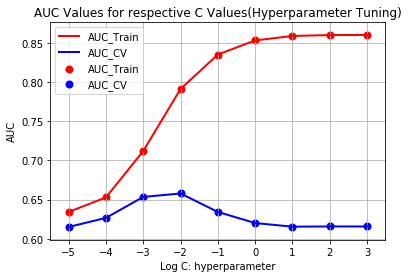

CPU times: user 1min 7s, sys: 245 ms, total: 1min 8s
Wall time: 1min 8s


In [0]:
%%time

BOW_TR_CSR = BOW_Train.tocsr()
BOW_CV_CSR = BOW_CV.tocsr()
BOW_TS_CSR = BOW_Test.tocsr()

C_Para = [0.00001, 0.0001, 0.001, 0.01,0.1, 1, 10,100,1000]
L_C_Para= []
ACCV = []
AUC_TR = []
AUC_CV = []

for i in tqdm(C_Para):
    LR = LogisticRegression(penalty='l2', C=i,class_weight='balanced', n_jobs=-1)
    LR.fit(BOW_Train, Y_Train)
    pred = LR.predict(BOW_CV)
    acc = accuracy_score(Y_CV, pred, normalize=True) * float(100)
    ACCV.append(acc)
    a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, LR.predict_proba(BOW_TR_CSR) [:,1])
    AUC_TR.append(auc(a_fpr_train, a_tpr_train))
    
    a_fpr_cv, a_tpr_cv, thresholds = roc_curve(Y_CV, LR.predict_proba(BOW_CV_CSR) [:,1])
    AUC_CV.append(auc(a_fpr_cv, a_tpr_cv))


for av in tqdm(C_Para):
    b = np.log10(av)
    L_C_Para.append(b) 

# Performance of model on Train data and Test data for each hyper parameter.
plt.plot(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2) 
plt.scatter(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2) 
plt.gca() 
plt.plot(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2) 
plt.scatter(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2) 
plt.gca()
plt.legend()
plt.xlabel("Log C: hyperparameter") 
plt.ylabel("AUC")
plt.title("AUC Values for respective C Values(Hyperparameter Tuning)")
plt.grid()
plt.show()

<font color='red'>**OBSERVATION:**</font>
<font color='blue'>
 1. C value has been choose based on the alpha which maximize the AUC CV score.<br>
 2. In this case <font color='green'>**C = 0.01**</font> is having the highest AUC CV score.<br>
 3. Hence <font color='green'>**C = 0.01**</font> is choosen as a best C value.

In [0]:
LR_OPT= 0.01
BOW_opt = LogisticRegression(penalty='l2', C=LR_OPT, class_weight='balanced', n_jobs=-1)
BOW_opt.fit(BOW_Train, Y_Train)
pred = BOW_opt.predict(BOW_Test)
acc = accuracy_score(Y_Test, pred, normalize=True) * float(100)
print('\nTest accuracy for C Value = {0} is {1}%'.format(LR_OPT,acc))

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, BOW_opt.predict_proba(BOW_TR_CSR) [:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, BOW_opt.predict_proba(BOW_TS_CSR)[:,1])


Test accuracy for C Value = 0.01 is 64.73982025962499%


# BOW ROC PLOT

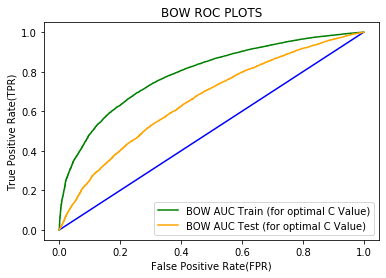

------------------------------------------------------------------------------------------------------------------------
AUC Train (for optimal C Value) = 0.7913722296177689
AUC Test (for optimal C Value) = 0.6586750584660401
CPU times: user 388 ms, sys: 7.01 ms, total: 395 ms
Wall time: 396 ms


In [0]:
%%time

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="BOW AUC Train (for optimal C Value)", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="BOW AUC Test (for optimal C Value)", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("BOW ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for optimal C Value) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for optimal C Value) =", auc(a_fpr_Test, a_tpr_Test))
BOW_AOPT=LR_OPT
BOW_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred1 = BOW_opt.predict(BOW_Train)
pred2 = BOW_opt.predict(BOW_Test)


# BOW CONFUSION MATRIX

CPU times: user 132 ms, sys: 34 ms, total: 166 ms
Wall time: 126 ms


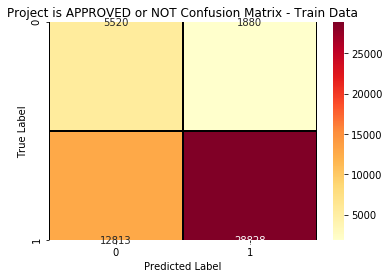

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred1)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 5520; False Negative = 12813; True Positive = 28828; False Positive = 1880<br>Accuracy (Overall, how often is the classifier correct) = 0.70<br>Precision(When it predicts yes, how often is it correct) =0.94<br>Misclassification (Overall, how often is it wrong) =0.30</font>


CPU times: user 518 ms, sys: 48 ms, total: 566 ms
Wall time: 524 ms


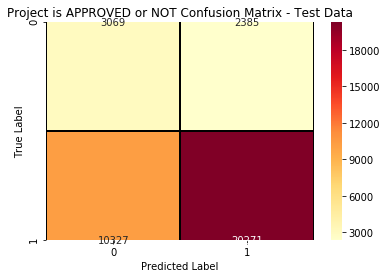

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred2)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>True Negative = 3069; False Negative = 10327; True Positive = 20271; False Positive = 2385<br>Accuracy (Overall, how often is the classifier correct) = 0.65<br>Precision(When it predicts yes, how often is it correct) =0.89<br>Misclassification (Overall, how often is it wrong) =0.35</font>

### Applying Logistic Regression on TFIDF,<font color='red'> SET 2</font>

100%|██████████| 9/9 [00:00<00:00, 32711.21it/s]


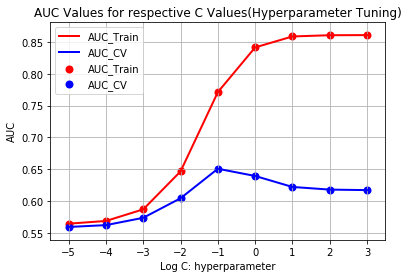

CPU times: user 57.6 s, sys: 218 ms, total: 57.9 s
Wall time: 57.9 s


In [0]:
%%time

TFIDF_TR_CSR = TFIDF_Train.tocsr()
TFIDF_CV_CSR = TFIDF_CV.tocsr()
TFIDF_TS_CSR = TFIDF_Test.tocsr()

C_Para = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000]
L_C_Para= []
ACCV = []
AUC_TR = []
AUC_CV = []

for i in tqdm(C_Para):
    LR = LogisticRegression(penalty='l2', C=i,class_weight='balanced', n_jobs=-1) ####
    LR.fit(TFIDF_Train, Y_Train)
    pred = LR.predict(TFIDF_CV)
    acc = accuracy_score(Y_CV, pred, normalize=True) * float(100)
    ACCV.append(acc)
    a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, LR.predict_proba(TFIDF_TR_CSR) [:,1])
    AUC_TR.append(auc(a_fpr_train, a_tpr_train))
    
    a_fpr_cv, a_tpr_cv, thresholds = roc_curve(Y_CV, LR.predict_proba(TFIDF_CV_CSR) [:,1])
    AUC_CV.append(auc(a_fpr_cv, a_tpr_cv))


for av in tqdm(C_Para):
    b = np.log10(av)
    L_C_Para.append(b)

# Performance of model on Train data and Test data for each hyper parameter.
plt.plot(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2)
plt.scatter(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2)
plt.gca()
plt.plot(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2)
plt.scatter(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2)
plt.gca()
plt.legend()
plt.xlabel("Log C: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC Values for respective C Values(Hyperparameter Tuning)")
plt.grid()
plt.show()

<font color='red'>**OBSERVATION:**</font>
<font color='blue'>
 1. C value has been choose based on the alpha which maximize the AUC CV score.<br>
 2. In this case <font color='green'>**C = 0.1**</font> is having the highest AUC CV score.<br>
 3. Hence <font color='green'>**C = 0.1**</font> is choosen as a best C value.

In [0]:
LR_OPT=0.1
TFIDF_opt =LogisticRegression(penalty='l2', C=LR_OPT, class_weight='balanced', n_jobs=-1)
TFIDF_opt.fit(TFIDF_Train, Y_Train)
pred = TFIDF_opt.predict(TFIDF_Test)
acc = accuracy_score(Y_Test, pred, normalize=True) * float(100)
print('\nTest accuracy for C Value = {0} is {1}%'.format(LR_OPT,acc))

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, TFIDF_opt.predict_proba(TFIDF_TR_CSR) [:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, TFIDF_opt.predict_proba(TFIDF_TS_CSR)[:,1])


Test accuracy for C Value = 0.1 is 65.3195384444691%


# TFIDF ROC PLOT

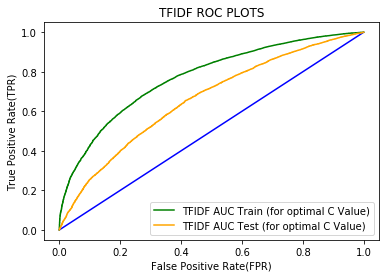

------------------------------------------------------------------------------------------------------------------------
AUC Train (for optimal C Value) = 0.7712090328723575
AUC Test (for optimal C Value) = 0.6587219180662647
CPU times: user 400 ms, sys: 8.01 ms, total: 408 ms
Wall time: 407 ms


In [0]:
%%time

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="TFIDF AUC Train (for optimal C Value)", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="TFIDF AUC Test (for optimal C Value)", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("TFIDF ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for optimal C Value) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for optimal C Value) =", auc(a_fpr_Test, a_tpr_Test))
TFIDF_AOPT=LR_OPT
TFIDF_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred3 = TFIDF_opt.predict(TFIDF_Train)
pred4 = TFIDF_opt.predict(TFIDF_Test)


# TFIDF CONFUSION MATRIX

CPU times: user 129 ms, sys: 32 ms, total: 161 ms
Wall time: 122 ms


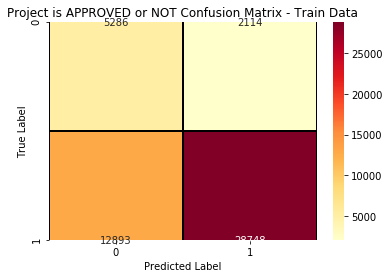

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred3)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>True Negative = 5286; False Negative = 12893; True Positive = 28748; False Positive = 2114<br>Accuracy (Overall, how often is the classifier correct) = 0.69<br>Precision(When it predicts yes, how often is it correct) =0.93<br>Misclassification (Overall, how often is it wrong) =0.31</font>

CPU times: user 116 ms, sys: 31 ms, total: 147 ms
Wall time: 110 ms


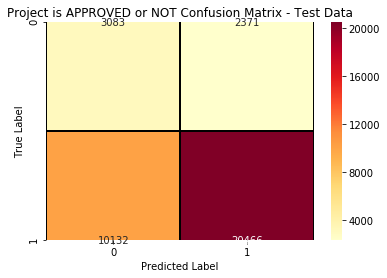

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred4)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>True Negative = 3083; False Negative = 10132; True Positive = 20466; False Positive = 2371<br>Accuracy (Overall, how often is the classifier correct) = 0.65<br>Precision(When it predicts yes, how often is it correct) =0.90<br>Misclassification (Overall, how often is it wrong) =0.35</font>

### Applying Logistic Regression on AVG W2V,<font color='red'> SET 3</font>

100%|██████████| 9/9 [00:00<00:00, 20901.85it/s]


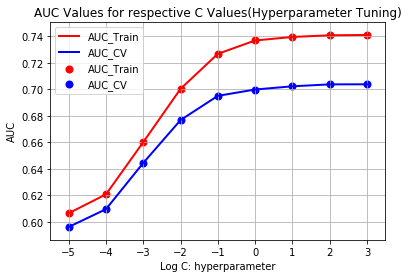

CPU times: user 12min 52s, sys: 3.39 s, total: 12min 56s
Wall time: 12min 57s


In [0]:
%%time
AVG_W2V_TR_CSR = AVG_W2V_Train.tocsr()
AVG_W2V_CV_CSR = AVG_W2V_CV.tocsr()
AVG_W2V_TS_CSR = AVG_W2V_Test.tocsr()

C_Para = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000]
L_C_Para= []
ACCV = []
AUC_TR = []
AUC_CV = []

for i in tqdm(C_Para):
    LR = LogisticRegression(penalty='l2', C=i,class_weight='balanced', n_jobs=-1) ####
    LR.fit(AVG_W2V_Train, Y_Train)
    pred = LR.predict(AVG_W2V_CV)
    acc = accuracy_score(Y_CV, pred, normalize=True) * float(100)
    ACCV.append(acc)
    a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, LR.predict_proba(AVG_W2V_TR_CSR) [:,1])
    AUC_TR.append(auc(a_fpr_train, a_tpr_train))
    
    a_fpr_cv, a_tpr_cv, thresholds = roc_curve(Y_CV, LR.predict_proba(AVG_W2V_CV_CSR) [:,1])
    AUC_CV.append(auc(a_fpr_cv, a_tpr_cv))


for av in tqdm(C_Para):
    b = np.log10(av)
    L_C_Para.append(b)

# Performance of model on Train data and Test data for each hyper parameter.
plt.plot(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2)
plt.scatter(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2)
plt.gca()
plt.plot(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2)
plt.scatter(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2)
plt.gca()
plt.legend()
plt.xlabel("Log C: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC Values for respective C Values(Hyperparameter Tuning)")
plt.grid()
plt.show()

<font color='red'>**OBSERVATION:**</font>
<font color='blue'>
 1. C value has been choose based on the alpha which maximize the AUC CV score.<br>
 2. In this case <font color='green'>**C = 1000**</font> is having the highest AUC CV score.<br>
 3. Hence <font color='green'>**C = 1000**</font> is choosen as a best C value.

In [0]:
LR_OPT=1000
AVG_W2V_opt =LogisticRegression(penalty='l2', C=LR_OPT, class_weight='balanced', n_jobs=-1)
AVG_W2V_opt.fit(AVG_W2V_Train, Y_Train)
pred = AVG_W2V_opt.predict(AVG_W2V_Test)
acc = accuracy_score(Y_Test, pred, normalize=True) * float(100)
print('\nTest accuracy for C Value = {0} is {1}%'.format(LR_OPT,acc))

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, AVG_W2V_opt.predict_proba(AVG_W2V_TR_CSR) [:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, AVG_W2V_opt.predict_proba(AVG_W2V_TS_CSR)[:,1])


Test accuracy for C Value = 1000 is 66.79241096194386%


# AVG_W2V ROC PLOT

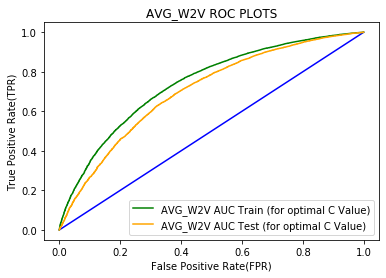

------------------------------------------------------------------------------------------------------------------------
AUC Train (for optimal C Value) = 0.7410346384183468
AUC Test (for optimal C Value) = 0.7026664886241549
CPU times: user 904 ms, sys: 9 ms, total: 913 ms
Wall time: 924 ms


In [0]:
%%time

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="AVG_W2V AUC Train (for optimal C Value)", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="AVG_W2V AUC Test (for optimal C Value)", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AVG_W2V ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for optimal C Value) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for optimal C Value) =", auc(a_fpr_Test, a_tpr_Test))
AVG_W2V_AOPT=LR_OPT
AVG_W2V_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred5 = AVG_W2V_opt.predict(AVG_W2V_Train)
pred6 = AVG_W2V_opt.predict(AVG_W2V_Test)

# AVG_W2V CONFUSION MATRIX

CPU times: user 121 ms, sys: 38 ms, total: 159 ms
Wall time: 120 ms


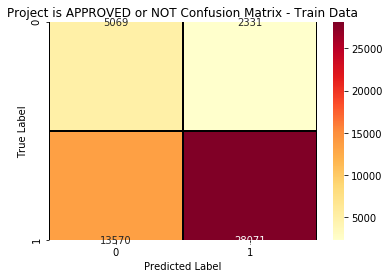

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred5)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')


<font color='blue'>**OBSERVATION:**<br>True Negative = 5069; False Negative = 13570; True Positive = 28071; False Positive = 2331<br>Accuracy (Overall, how often is the classifier correct) = 0.68<br>Precision(When it predicts yes, how often is it correct) =0.92<br>Misclassification (Overall, how often is it wrong) =0.32</font>

CPU times: user 106 ms, sys: 39 ms, total: 145 ms
Wall time: 107 ms


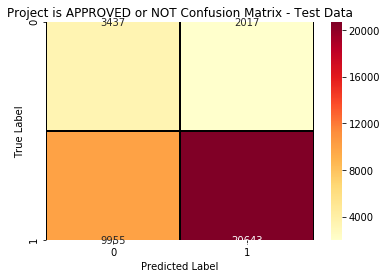

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred6)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>True Negative = 3437; False Negative = 9955; True Positive = 20643; False Positive = 2017<br>Accuracy (Overall, how often is the classifier correct) = 0.67<br>Precision(When it predicts yes, how often is it correct) =0.91<br>Misclassification (Overall, how often is it wrong) =0.33<br>

### Applying Logistic Regression on TFIDF W2V,<font color='red'> SET 4</font>

100%|██████████| 9/9 [00:00<00:00, 5518.01it/s]


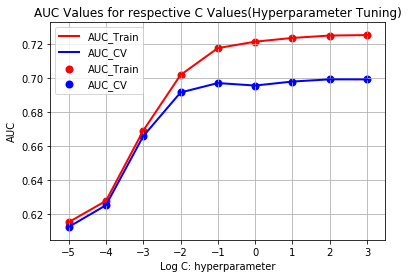

In [0]:
TFIDF_W2V_TR_CSR = TFIDF_W2V_Train.tocsr()
TFIDF_W2V_CV_CSR = TFIDF_W2V_CV.tocsr()
TFIDF_W2V_TS_CSR = TFIDF_W2V_Test.tocsr()

C_Para = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000]
L_C_Para= []
ACCV = []
AUC_TR = []
AUC_CV = []

for i in tqdm(C_Para):
    LR = LogisticRegression(penalty='l2', C=i,class_weight='balanced', n_jobs=-1) ####
    LR.fit(TFIDF_W2V_Train, Y_Train)
    pred = LR.predict(TFIDF_W2V_CV)
    acc = accuracy_score(Y_CV, pred, normalize=True) * float(100)
    ACCV.append(acc)
    a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, LR.predict_proba(TFIDF_W2V_TR_CSR) [:,1])
    AUC_TR.append(auc(a_fpr_train, a_tpr_train))
    
    a_fpr_cv, a_tpr_cv, thresholds = roc_curve(Y_CV, LR.predict_proba(TFIDF_W2V_CV_CSR) [:,1])
    AUC_CV.append(auc(a_fpr_cv, a_tpr_cv))


for av in tqdm(C_Para):
    b = np.log10(av)
    L_C_Para.append(b)

# Performance of model on Train data and Test data for each hyper parameter.
plt.plot(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2)
plt.scatter(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2)
plt.gca()
plt.plot(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2)
plt.scatter(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2)
plt.gca()
plt.legend()
plt.xlabel("Log C: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC Values for respective C Values(Hyperparameter Tuning)")
plt.grid()
plt.show()

<font color='red'>**OBSERVATION:**</font>
<font color='blue'>
 1. C value has been choose based on the alpha which maximize the AUC CV score.<br>
 2. In this case <font color='green'>**C = 100**</font> is having the highest AUC CV score.<br>
 3. Hence <font color='green'>**C = 100**</font> is choosen as a best C value.

In [0]:
LR_OPT=100
TFIDF_W2V_opt =LogisticRegression(penalty='l2', C=LR_OPT, class_weight='balanced', n_jobs=-1)
TFIDF_W2V_opt.fit(TFIDF_W2V_Train, Y_Train)
pred = TFIDF_W2V_opt.predict(TFIDF_W2V_Test)
acc = accuracy_score(Y_Test, pred, normalize=True) * float(100)
print('\nTest accuracy for C Value = {0} is {1}%'.format(LR_OPT,acc))

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, TFIDF_W2V_opt.predict_proba(TFIDF_W2V_TR_CSR) [:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, TFIDF_W2V_opt.predict_proba(TFIDF_W2V_TS_CSR)[:,1])


Test accuracy for C Value = 100 is 63.707977366026846%


# TFIDF_W2V ROC PLOT

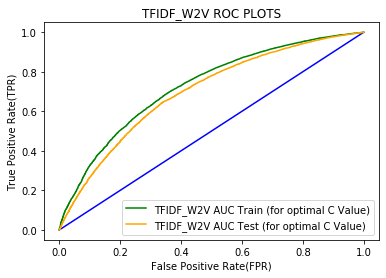

------------------------------------------------------------------------------------------------------------------------
AUC Train (for optimal C Value) = 0.7252246892193699
AUC Test (for optimal C Value) = 0.697504403304352
CPU times: user 570 ms, sys: 5.02 ms, total: 575 ms
Wall time: 580 ms


In [0]:
%%time

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="TFIDF_W2V AUC Train (for optimal C Value)", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="TFIDF_W2V AUC Test (for optimal C Value)", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("TFIDF_W2V ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for optimal C Value) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for optimal C Value) =", auc(a_fpr_Test, a_tpr_Test))
TFIDF_W2V_AOPT=LR_OPT
TFIDF_W2V_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred7 = TFIDF_W2V_opt.predict(TFIDF_W2V_Train)
pred8 = TFIDF_W2V_opt.predict(TFIDF_W2V_Test)

# TFIDF_W2V CONFUSION MATRIX

CPU times: user 130 ms, sys: 39 ms, total: 169 ms
Wall time: 134 ms


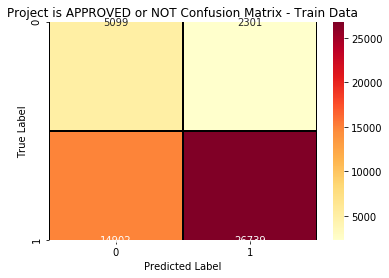

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred7)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>True Negative = 5099; False Negative = 14902; True Positive = 26739; False Positive = 2301<br>Accuracy (Overall, how often is the classifier correct) = 0.65<br>Precision(When it predicts yes, how often is it correct) =0.92<br>Misclassification (Overall, how often is it wrong) =0.35</font>

CPU times: user 134 ms, sys: 41 ms, total: 175 ms
Wall time: 127 ms


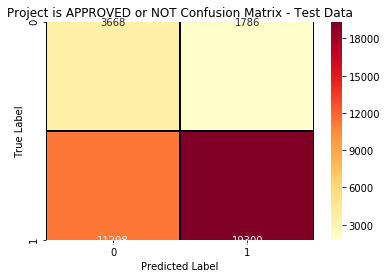

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred8)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>True Negative = 3668; False Negative = 11308; True Positive = 19290; False Positive = 1786<br>Accuracy (Overall, how often is the classifier correct) = 0.64<br>Precision(When it predicts yes, how often is it correct) =0.92<br>Misclassification (Overall, how often is it wrong) =0.36</font>

### Applying Logistic Regression on below features <font color='red'> SET 5</font>
<ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>

100%|██████████| 9/9 [00:00<00:00, 46834.66it/s]


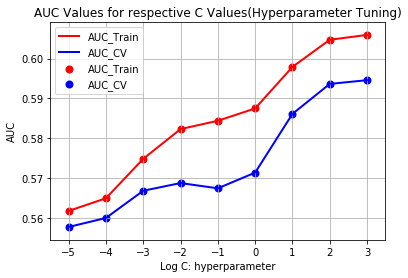

In [0]:
FiveF_TR_CSR = FiveF_Train.tocsr()
FiveF_CV_CSR = FiveF_CV.tocsr()
FiveF_TS_CSR = FiveF_Test.tocsr()

C_Para = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000]
L_C_Para= []
ACCV = []
AUC_TR = []
AUC_CV = []

for i in tqdm(C_Para):
    LR = LogisticRegression(penalty='l2', C=i,class_weight='balanced', n_jobs=-1) ####
    LR.fit(FiveF_Train, Y_Train)
    pred = LR.predict(FiveF_CV)
    acc = accuracy_score(Y_CV, pred, normalize=True) * float(100)
    ACCV.append(acc)
    a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, LR.predict_proba(FiveF_TR_CSR) [:,1])
    AUC_TR.append(auc(a_fpr_train, a_tpr_train))
    
    a_fpr_cv, a_tpr_cv, thresholds = roc_curve(Y_CV, LR.predict_proba(FiveF_CV_CSR) [:,1])
    AUC_CV.append(auc(a_fpr_cv, a_tpr_cv))


for av in tqdm(C_Para):
    b = np.log10(av)
    L_C_Para.append(b)

# Performance of model on Train data and Test data for each hyper parameter.
plt.plot(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2)
plt.scatter(L_C_Para, AUC_TR, label='AUC_Train',color='red',linewidth=2)
plt.gca()
plt.plot(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2)
plt.scatter(L_C_Para, AUC_CV, label='AUC_CV',color='blue',linewidth=2)
plt.gca()
plt.legend()
plt.xlabel("Log C: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC Values for respective C Values(Hyperparameter Tuning)")
plt.grid()
plt.show()

<font color='red'>**OBSERVATION:**</font>
<font color='blue'>
 1. C value has been choose based on the alpha which maximize the AUC CV score.<br>
 2. In this case <font color='green'>**C = 1000**</font> is having the highest AUC CV score.<br>
 3. Hence <font color='green'>**C = 1000**</font> is choosen as a best C value.

In [0]:
LR_OPT=1000
FiveF_opt =LogisticRegression(penalty='l2', C=LR_OPT, class_weight='balanced', n_jobs=-1)
FiveF_opt.fit(FiveF_Train, Y_Train)
pred = FiveF_opt.predict(FiveF_Test)
acc = accuracy_score(Y_Test, pred, normalize=True) * float(100)
print('\nTest accuracy for C Value = {0} is {1}%'.format(LR_OPT,acc))

a_fpr_train, a_tpr_train, thresholds = roc_curve(Y_Train, FiveF_opt.predict_proba(FiveF_TR_CSR) [:,1])
a_fpr_Test, a_tpr_Test, thresholds = roc_curve(Y_Test, FiveF_opt.predict_proba(FiveF_TS_CSR)[:,1])


Test accuracy for C Value = 1000 is 59.192277820925334%


# ROC PLOT FOR SELECTED FEATURES

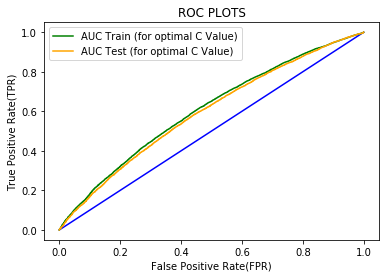

------------------------------------------------------------------------------------------------------------------------
AUC Train (for optimal C Value) = 0.6059365185170281
AUC Test (for optimal C Value) = 0.594040041899913
CPU times: user 248 ms, sys: 7.99 ms, total: 256 ms
Wall time: 256 ms


In [0]:
%%time

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
    
plt.plot([0,1],[0,1],'k-', color='blue')
plt.plot(a_fpr_train, a_tpr_train, label="AUC Train (for optimal C Value)", color='green')
plt.plot(a_fpr_Test, a_tpr_Test, label="AUC Test (for optimal C Value)", color='orange')
plt.legend() 
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("-"*120)
print("AUC Train (for optimal C Value) =", auc(a_fpr_train, a_tpr_train))
print("AUC Test (for optimal C Value) =", auc(a_fpr_Test, a_tpr_Test))
FiveF_AOPT=LR_OPT
FiveF_AUC=round(auc(a_fpr_Test, a_tpr_Test)*100)
pred9 = FiveF_opt.predict(FiveF_Train)
pred10 = FiveF_opt.predict(FiveF_Test)

# CONFUSION MATRIX FOR SELECTED FEATURES

CPU times: user 134 ms, sys: 42 ms, total: 176 ms
Wall time: 136 ms


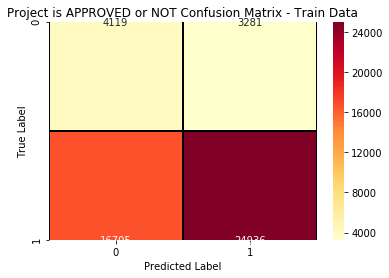

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
%matplotlib inline
from sklearn.metrics import confusion_matrix
Train = confusion_matrix(Y_Train, pred9)
sns.heatmap(Train,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>True Negative = 4119; False Negative = 16705; True Positive = 24936; False Positive = 3281<br>Accuracy (Overall, how often is the classifier correct) = 0.59<br>Precision(When it predicts yes, how often is it correct) =0.88<br>Misclassification (Overall, how often is it wrong) =0.41</font>

CPU times: user 121 ms, sys: 35 ms, total: 156 ms
Wall time: 121 ms


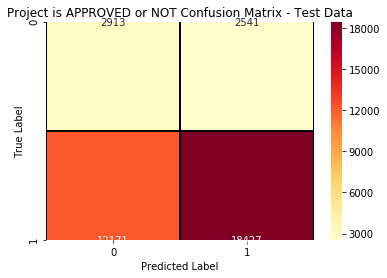

In [0]:
%%time
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
Test = confusion_matrix(Y_Test, pred10)
sns.heatmap(Test,annot=True,cbar=True,fmt='d',cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>True Negative = 2913; False Negative = 12171; True Positive = 18427; False Positive = 2541<br>Accuracy (Overall, how often is the classifier correct) = 0.59<br>Precision(When it predicts yes, how often is it correct) =0.88<br>Misclassification (Overall, how often is it wrong) =0.41</font>

<h1>3. Conclusions</h1>

In [0]:
# Please compare all your models using Prettytable library

pt = PrettyTable()
pt.field_names= ("Vectorizer", "Model", "HyperParameter", "AUC")
pt.add_row(["BOW", "Logistic Regression",BOW_AOPT, BOW_AUC])
pt.add_row(["TFIDF", "Logistic Regression", TFIDF_AOPT, TFIDF_AUC])
pt.add_row(["AVG_W2V", "Logistic Regression",AVG_W2V_AOPT, AVG_W2V_AUC])
pt.add_row(["TFIDF_W2V", "Logistic Regression", TFIDF_W2V_AOPT, TFIDF_W2V_AUC])
pt.add_row(["SET 5", "Logistic Regression",FiveF_AOPT, FiveF_AUC])
print(pt)

+------------+---------------------+----------------+------+
| Vectorizer |        Model        | HyperParameter | AUC  |
+------------+---------------------+----------------+------+
|    BOW     | Logistic Regression |      0.01      | 66.0 |
|   TFIDF    | Logistic Regression |      0.1       | 66.0 |
|  AVG_W2V   | Logistic Regression |      1000      | 70.0 |
| TFIDF_W2V  | Logistic Regression |      100       | 70.0 |
|   SET 5    | Logistic Regression |      1000      | 59.0 |
+------------+---------------------+----------------+------+


<font color='darkblue'>**SUMMARY:**</font><br>
<font color='blue'>
    1. Compare to KNN and Naive Bayes <font color='green'>**"Logistic Regression"**</font> is giving better AUC value.<br>
    2. But response latency time is <font color='red'>**"High"**</font> when compare to Naive Bayes.<br>
    3. C value needs to be choose correctly to have better performance else there is a chance for Overfitting or Underfitting the model.<br>
    4.<font color='green'>**"AVG_W2V"** performing very well</font>in acuuracy and misclassification scores.When compare to other vectorizer such as BOW,TFIDF and TFIDF_W2V.<br>
    </font>